## Demonstration of function `resample_in_space()`

This notebook demonstrates the functionality of the `xcube.core.resampling.resample_in_space` function.

In [1]:
import xarray as xr
from xcube.core.gridmapping import GridMapping
from xcube.core.resampling import resample_in_space

---
First configure matplotlib, so we can see no-data vaklues.

In [2]:
import copy
import matplotlib
import matplotlib.pyplot as plt

no_data_color = 'yellow'
# no_data_color = 'red'

gray = copy.copy(matplotlib.cm.get_cmap('gray'))
gray.set_bad(color=no_data_color)

diverging = copy.copy(matplotlib.cm.get_cmap('PRGn'))
# diverging = copy.copy(matplotlib.cm.get_cmap('Spectral'))
diverging.set_bad(color=no_data_color)

In [3]:
def imshow(var):
    var.plot.imshow(figsize=(16,16), vmax=0.25, cmap=gray)

---

In [4]:
%%time
source_ds = xr.open_zarr('../inputdata/S3-OLCI-L2A.zarr.zip')
source_ds

Wall time: 25.9 ms


<xarray.Dataset>
Dimensions:        (x: 1189, y: 1890)
Coordinates:
    lat            (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
    lon            (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    quality_flags  (y, x) uint32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (y, x) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

Wall time: 226 ms


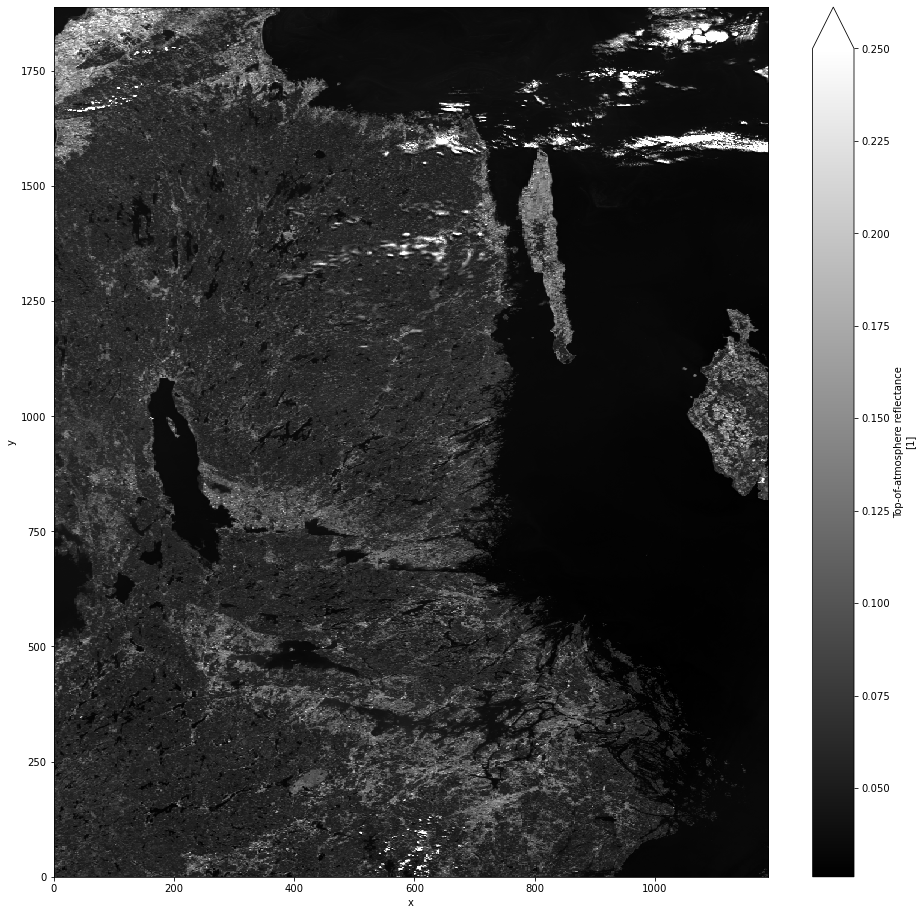

In [5]:
%%time
imshow(source_ds.rtoa_8)

In [6]:
source_gm = GridMapping.from_dataset(source_ds)
source_gm

class: **Coords2DGridMapping**
* is_regular: False
* is_j_axis_up: _unknown_
* is_lon_360: False
* crs: epsg:4326
* xy_res: (0.0025, 0.0025)  _estimated_
* xy_bbox: (12.693050999999999, 55.19893, 20.006134, 60.63943999999999)
* ij_bbox: (0, 0, 1189, 1890)
* xy_dim_names: ('x', 'y')
* xy_var_names: ('lon', 'lat')
* size: (1189, 1890)
* tile_size: (512, 512)

In [7]:
target_gm = source_gm.to_regular(tile_size=512)
target_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: epsg:4326
* xy_res: (0.0025, 0.0025)
* xy_bbox: (12.693050999999999, 55.19893, 20.008051, 60.64143)
* ij_bbox: (0, 0, 2926, 2177)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (2926, 2177)
* tile_size: (512, 512)

In [8]:
%%time
target_ds = resample_in_space(source_ds, source_gm=source_gm, target_gm=target_gm)
target_ds

Wall time: 1.18 s


<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 2177, lon: 2926)
Coordinates:
  * lat            (lat) float64 60.64 60.64 60.64 60.63 ... 55.21 55.2 55.2
  * lon            (lon) float64 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.0 20.01
    lon_bnds       (lon, bnds) float64 12.69 12.7 12.7 ... 20.01 20.01 20.01
    lat_bnds       (lat, bnds) float64 60.64 60.64 60.64 ... 55.2 55.2 55.2
Dimensions without coordinates: bnds
Data variables:
    quality_flags  (lat, lon) uint32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (lat, lon) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (lat, lon) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (lat, lon) float32 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

Wall time: 2.83 s


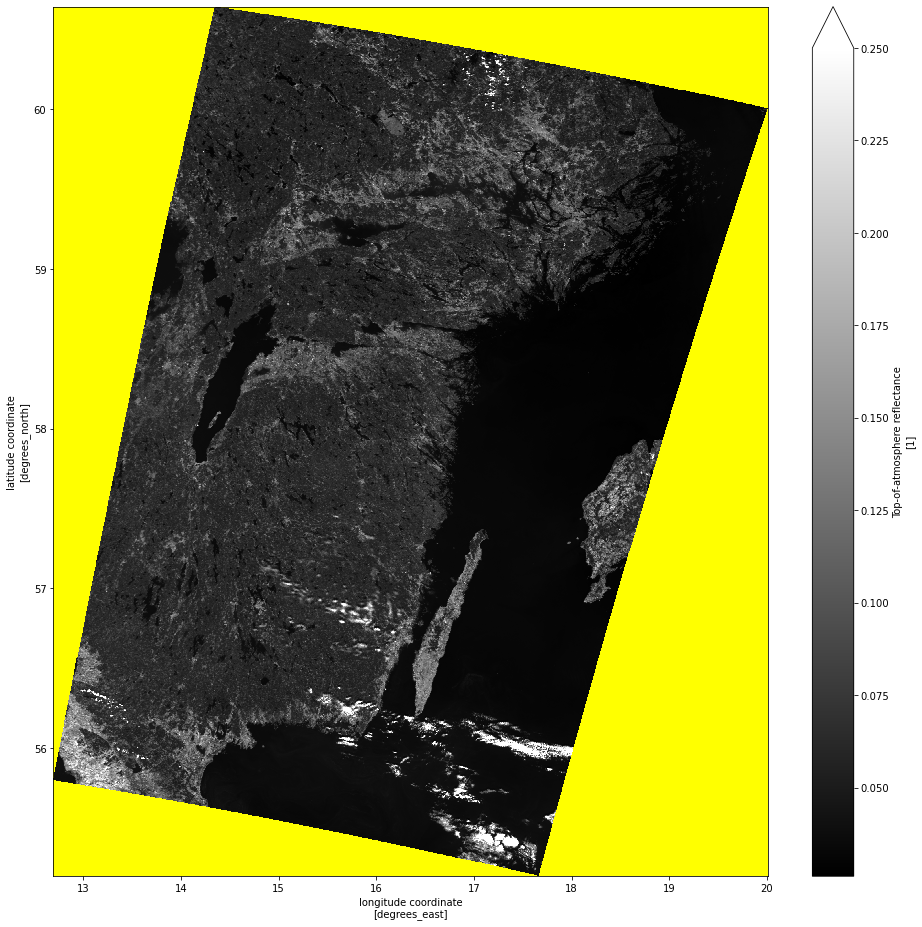

In [9]:
%%time
imshow(target_ds.rtoa_8)

In [10]:
# target_ds.to_zarr('target_ds.zarr', mode='w')
# target_ds = xr.open_zarr('target_ds.zarr')
# target_ds

In [11]:
downsampled_target_gm = target_gm.scale(0.25, tile_size=128)
downsampled_target_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: epsg:4326
* xy_res: (0.01, 0.01)
* xy_bbox: (12.693050999999999, 55.19893, 20.013050999999997, 60.638929999999995)
* ij_bbox: (0, 0, 732, 544)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (732, 544)
* tile_size: (128, 128)

In [12]:
%%time
downsampled_ds = resample_in_space(target_ds, source_gm=target_gm, target_gm=downsampled_target_gm)
downsampled_ds

Wall time: 7.75 s


<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 544, lon: 732)
Coordinates:
  * lon            (lon) float64 12.7 12.71 12.72 12.73 ... 19.99 20.0 20.01
  * lat            (lat) float64 60.63 60.62 60.61 60.6 ... 55.22 55.21 55.2
    lon_bnds       (lon, bnds) float64 12.69 12.7 12.7 12.71 ... 20.0 20.0 20.01
    lat_bnds       (lat, bnds) float64 60.64 60.63 60.63 ... 55.21 55.21 55.2
Dimensions without coordinates: bnds
Data variables:
    quality_flags  (lat, lon) uint32 dask.array<chunksize=(128, 128), meta=np.ndarray>
    rtoa_3         (lat, lon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    rtoa_6         (lat, lon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    rtoa_8         (lat, lon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

D:\Miniconda3\envs\xcube\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\chunk.py:142: RuntimeWarning: Mean of empty slice
  return reduction(x.reshape(newshape), axis=tuple(range(1, x.ndim * 2, 2)), **kwargs)


Wall time: 3.55 s


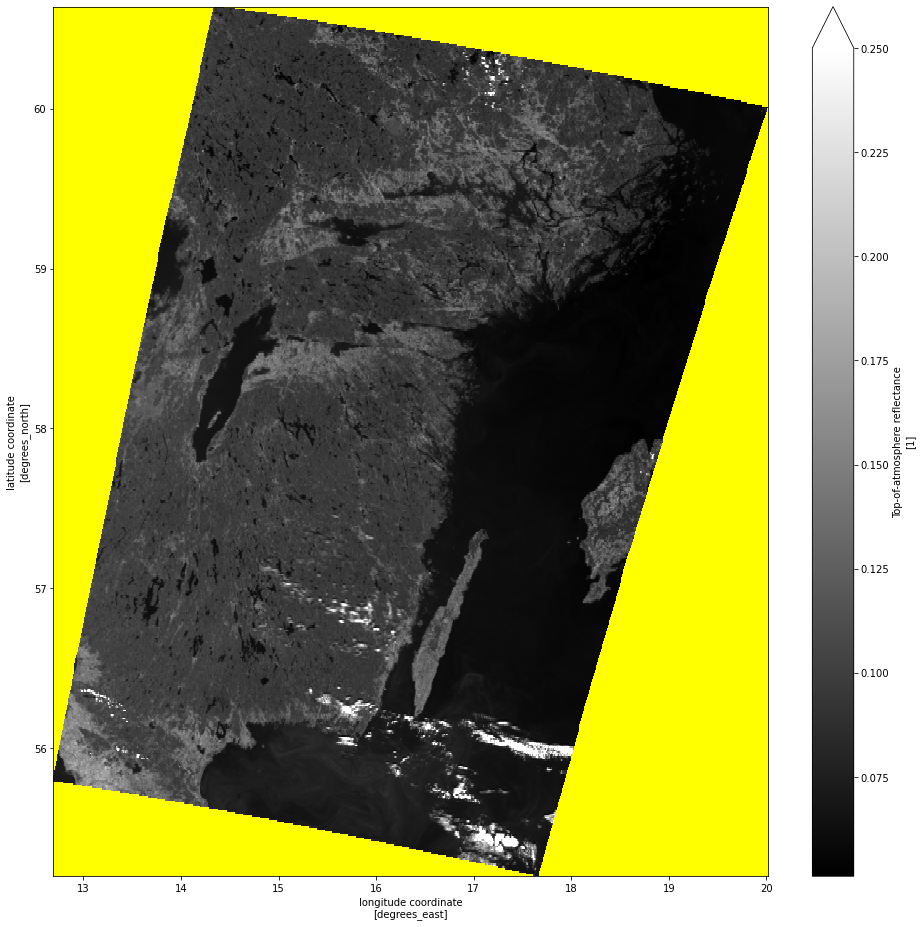

In [13]:
%%time
imshow(downsampled_ds.rtoa_6)

In [14]:
upsampled_target_gm = target_gm.scale(4, tile_size=1024)
upsampled_target_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: epsg:4326
* xy_res: (0.000625, 0.000625)
* xy_bbox: (12.693050999999999, 55.19893, 20.008051, 60.64143)
* ij_bbox: (0, 0, 11704, 8708)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (11704, 8708)
* tile_size: (1024, 1024)

In [15]:
%%time
upsampled_target_gm = resample_in_space(target_ds, source_gm=target_gm, target_gm=downsampled_target_gm)
upsampled_target_gm

Wall time: 7.76 s


<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 544, lon: 732)
Coordinates:
  * lon            (lon) float64 12.7 12.71 12.72 12.73 ... 19.99 20.0 20.01
  * lat            (lat) float64 60.63 60.62 60.61 60.6 ... 55.22 55.21 55.2
    lon_bnds       (lon, bnds) float64 12.69 12.7 12.7 12.71 ... 20.0 20.0 20.01
    lat_bnds       (lat, bnds) float64 60.64 60.63 60.63 ... 55.21 55.21 55.2
Dimensions without coordinates: bnds
Data variables:
    quality_flags  (lat, lon) uint32 dask.array<chunksize=(128, 128), meta=np.ndarray>
    rtoa_3         (lat, lon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    rtoa_6         (lat, lon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
    rtoa_8         (lat, lon) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

D:\Miniconda3\envs\xcube\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
D:\Miniconda3\envs\xcube\lib\site-packages\dask\array\chunk.py:142: RuntimeWarning: Mean of empty slice
  return reduction(x.reshape(newshape), axis=tuple(range(1, x.ndim * 2, 2)), **kwargs)


Wall time: 3.68 s


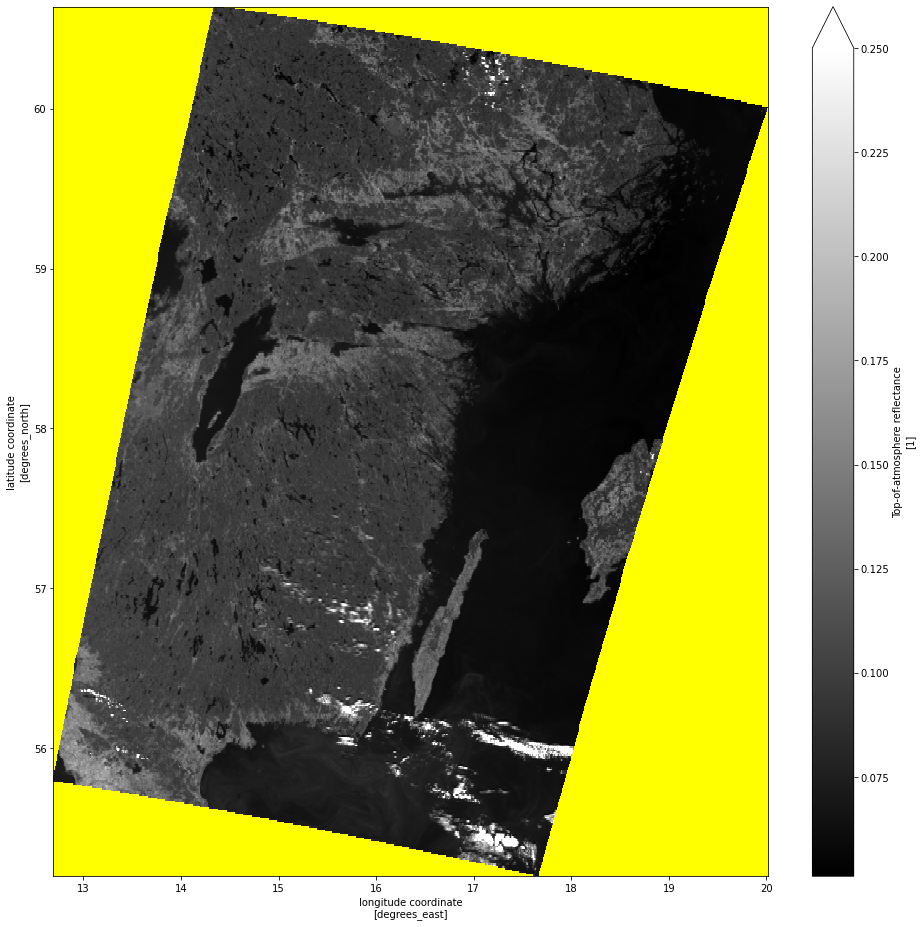

In [16]:
%%time
imshow(upsampled_target_gm.rtoa_6)